## Exploring the data

In [248]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import numpy as np

In [249]:
#import data
df = pd.read_csv("../../data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [250]:
#investigate shape of data, how large is our dataset?
df.shape

(3333, 21)

In [251]:
#drop phone numbers and area code for privacy concerns
#We will use state data for analysis rather than the area codes
df = df.drop(["phone number", "area code"], axis = 1)
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [252]:

# df['churn'] = df['churn'].astype(int) 
# df["international plan"] = df["international plan"].map({"yes":1,"no":0})
# df["voice mail plan"] = df["voice mail plan"].map({"yes":1,"no":0})

This data set is small, but very clean. There are no missing values to handle. 

In [253]:
#are we missing any data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

Let's look at what the churn rate is over the data set. We are dealing with a very imbalanced data set. We will most likely need to use SMOTE to over sample data when modeling.

In [254]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

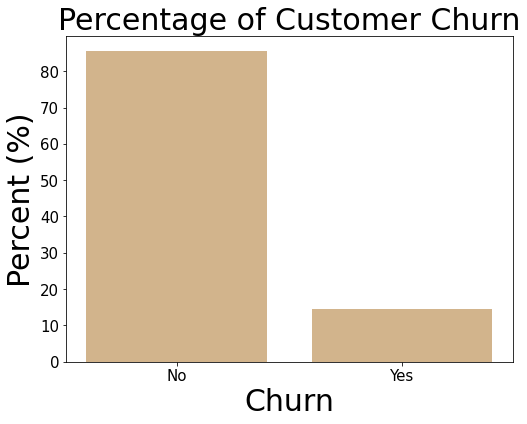

In [255]:
#Let's visualize the churn rate
fig,ax = plt.subplots(figsize=(8,6))
plt.bar(x = df["churn"].unique(), height = round(df["churn"].value_counts(normalize=True)*100, 2), color= "tan")
plt.xticks(ticks=[0,1], labels=["No", "Yes"], fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("Churn", fontsize = 30)
ax.set_ylabel("Percent (%)", fontsize = 30)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title("Percentage of Customer Churn",fontsize = 30)
plt.show()

## Feature Eningeering

Rather than writing code over and over I wrote this simple code to add multiple columns and output a new column to the dataset.

In [256]:
def combine(name, *cols):
    "This function will name a new column and add as many columns as necessary"
    df[name] = sum(cols)

In [257]:
#Let's find total domestic minutes for each customer.
combine("total_domestic_minutes", 
        df["total day minutes"], 
        df["total eve minutes"], 
        df["total night minutes"])

In [258]:
#Let's find total domestic calls for each customer.
combine("total_domestic_calls", 
        df["total day calls"], 
        df["total eve calls"], 
        df["total night calls"])

In [259]:
#Let's find total domestic charges for each customer.
combine("total_domestic_charge", 
        df["total day charge"], 
        df["total eve charge"], 
        df["total night charge"])

In [260]:
#Let's find total charges for each customer.
combine("total_charge", 
        df["total_domestic_charge"], 
        df["total intl charge"])

## State Turn Rate
We wanted to investigate what the states had the highest turn rates. 

In [261]:
#groups states and looks at churn and not turn rates 
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
...,...,...,...
97,WI,True,0.089744
98,WV,False,0.905660
99,WV,True,0.094340
100,WY,False,0.883117


In [262]:
#looks at churn rates of each state
states_churn_rate = states.loc[states['churn'] == True].sort_values("percent", ascending =False)\
                                                        .reset_index().drop("index", axis =1)
states_churn_rate

,state,churn,percent
0,NJ,True,0.264706
1,CA,True,0.264706
2,TX,True,0.250000
3,MD,True,0.242857
4,SC,True,0.233333
5,MI,True,0.219178
6,MS,True,0.215385
7,NV,True,0.212121
8,WA,True,0.212121
9,ME,True,0.209677


In [263]:
#looking at the sorted churn rates we noticed some points where we could divide the data
#this cell assigns states to a high turn category.
#20% percent is alot of churn
high_churn = states_churn_rate.loc[states_churn_rate['percent'] >= .2]
high_churn_states = list(high_churn['state'])
high_churn_states

['NJ', 'CA', 'TX', 'MD', 'SC', 'MI', 'MS', 'NV', 'WA', 'ME', 'MT', 'AR']

In [264]:
#we first tried to split the data between 20% and 10 % but the category was to large, 
#we wanted to find more evenness in the splits, so we split at 15%
med_churn = states_churn_rate.loc[(states_churn_rate['percent'] < .2) & (states_churn_rate['percent'] >= .15)]
med_churn_states = list(med_churn['state'])
med_churn_states

['KS', 'NY', 'MN', 'PA', 'MA', 'CT', 'NC', 'NH']

In [265]:
#finishing the "medium" split
medlow_churn = states_churn_rate.loc[(states_churn_rate['percent'] < .15) & (states_churn_rate['percent'] >= .1)]
medlow_churn_states = list(medlow_churn['state'])
medlow_churn_states

['GA',
 'DE',
 'OK',
 'OR',
 'UT',
 'CO',
 'KY',
 'SD',
 'OH',
 'FL',
 'IN',
 'ID',
 'WY',
 'MO',
 'VT',
 'AL']

In [266]:
#finish the split
low_churn = states_churn_rate.loc[states_churn_rate['percent'] < .1]
low_churn_states = list(low_churn["state"])
low_churn_states

['NM',
 'ND',
 'WV',
 'TN',
 'DC',
 'RI',
 'WI',
 'IL',
 'NE',
 'LA',
 'IA',
 'VA',
 'AZ',
 'AK',
 'HI']

In [267]:
def categorize(state):
    
    """assigns states to high, medium, medium-low and low churn rate categories
    
    returns a the state now assigned to a category"""
    
    if state in high_churn_states:
        state = "high"
    elif state in med_churn_states:
        state = "med"
    elif state in medlow_churn_states:
        state = "med-low"
    else:
        state ="low"
    return state

def competition(df):
    
    """applies the categorize function to a new column named state, assigns the modified column to  a new 
    category called 'churn_rate' 
    
    returns the data frame with the new column"""
    
    df["churn_rate"] = df["state"].apply(categorize)
    return df

In [268]:
#runs the function, expanded dataset!
competition(df)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,False,512.6,326,56.18,57.53,med


## churned customers vs current customers

In [269]:
#check the dataset
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,False,512.6,326,56.18,57.53,med


In [270]:
#create a new dataset with just the churned clients
churn = df[df["churn"] == 1]
churn

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
10,IN,65,no,no,0,129.1,137,21.95,228.5,83,...,12.7,6,3.43,4,True,566.4,331,50.77,54.20,med-low
15,NY,161,no,no,0,332.9,67,56.59,317.8,97,...,5.4,9,1.46,4,True,811.3,292,90.83,92.29,med
21,CO,77,no,no,0,62.4,89,10.61,169.9,121,...,5.7,6,1.54,5,True,441.9,274,34.48,36.02,med-low
33,AZ,12,no,no,0,249.6,118,42.43,252.4,119,...,11.8,3,3.19,1,True,782.2,327,76.49,79.68,low
41,MD,135,yes,yes,41,173.1,85,29.43,203.9,107,...,14.6,15,3.94,0,True,499.2,270,52.26,56.20,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,no,no,0,280.0,113,47.60,202.2,90,...,10.4,4,2.81,0,True,639.0,306,71.85,74.66,high
3304,IL,71,yes,no,0,186.1,114,31.64,198.6,140,...,13.8,5,3.73,4,True,591.2,334,57.81,61.54,low
3320,GA,122,yes,no,0,140.0,101,23.80,196.4,77,...,9.7,4,2.62,4,True,456.5,311,45.89,48.51,med-low
3322,MD,62,no,no,0,321.1,105,54.59,265.5,122,...,11.5,2,3.11,4,True,767.1,299,85.28,88.39,high


In [271]:
# create a new dataset with just the remaining clients
not_churn = df[df["churn"] ==0]
not_churn

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,False,512.6,326,56.18,57.53,med


## investigate some columns
What does the column data look like for the data set? Is there any skew? Are there any obivous outliers?

<AxesSubplot:xlabel='total day minutes', ylabel='Count'>

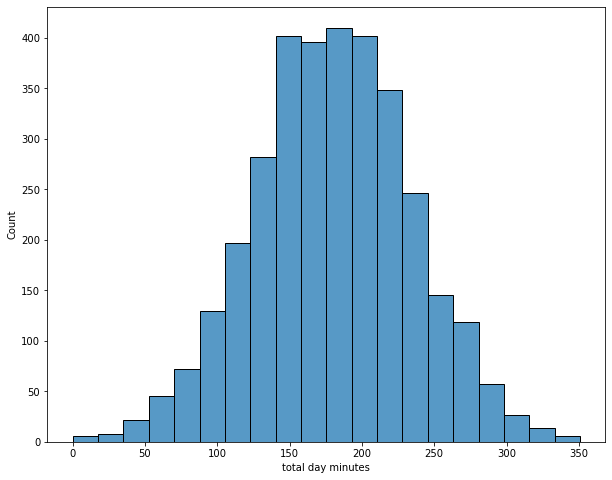

In [272]:
#fairly normal distibution
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(df["total day minutes"], bins = 20)

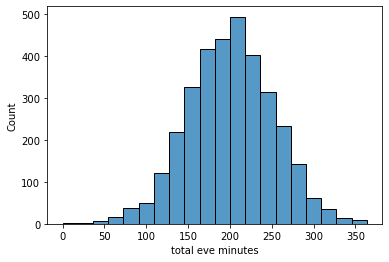

In [273]:
#again fairly normal distribution
fig, ax = plt.subplots()
sns.histplot(df["total eve minutes"], bins = 20)
plt.show()

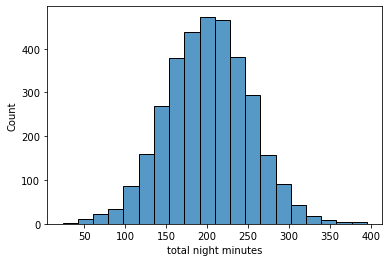

In [274]:
#This data has fairly normal data distribution as well
fig, ax = plt.subplots()
sns.histplot(df["total night minutes"], bins = 20)
plt.show()

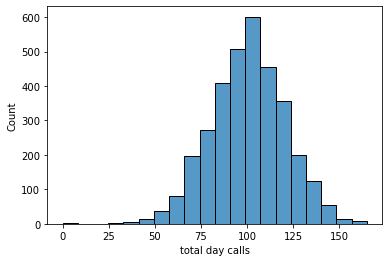

In [275]:
#This data has some reight skew
fig, ax = plt.subplots()
sns.histplot(df["total day calls"], bins = 20)
plt.show()

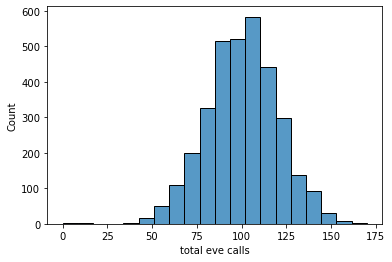

In [276]:
#This data has some reight skew
fig, ax = plt.subplots()
sns.histplot(df["total eve calls"], bins = 20)
plt.show()

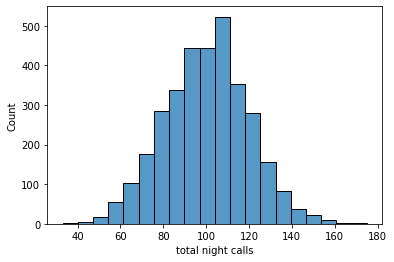

In [277]:
#This data has fairly normal data distribution
fig, ax = plt.subplots()
sns.histplot(df["total night calls"], bins = 20)
plt.show()

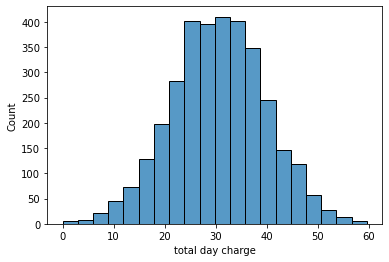

In [278]:
#This data has fairly normal distribution as well
fig, ax = plt.subplots()
sns.histplot(df["total day charge"], bins = 20)
plt.show()

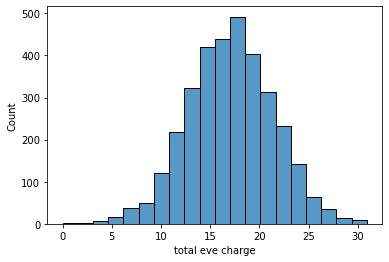

In [279]:
#This data has fairly normal distribution as well
fig, ax = plt.subplots()
sns.histplot(df["total eve charge"], bins = 20)
plt.show()

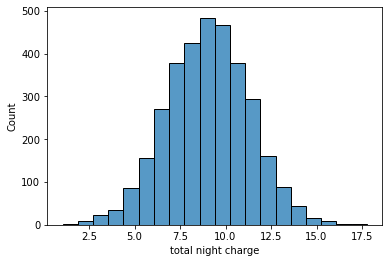

In [280]:
#This data has fairly normal distribution
fig, ax = plt.subplots()
sns.histplot(df["total night charge"], bins = 20)
plt.show()

## Diferrences bewteen time periods
Were rates different during the day? Was it affecting peoples usage?

In [281]:
#I wanted to looks at the rates people were paying per minute. 
def rate(col1, col2, period):
    "finds the rate for different types of calls"
    num = df[col1].mean()
    denom = df[col2].mean()
    rate = round(num/denom, 2)
    print(f"The {period} rate is ${rate} per minute")

In [282]:
day_rate = rate("total day charge", "total day minutes", "daytime")
eve_rate = rate("total eve charge", "total eve minutes", "evening")
night_rate = rate("total night charge", "total night minutes", "night time")
intl_rate = rate("total intl charge", "total intl minutes", "international")

The daytime rate is $0.17 per minute
The evening rate is $0.09 per minute
The night time rate is $0.05 per minute
The international rate is $0.27 per minute


### Time Spent talking

In [283]:
def avg_min_diff(df, col1, col2, period1, period2, churn):
    """prints out the difference of time spent talking between time periods"""
    average_difference = round(df[col2].mean() - df[col1].mean(), 2)
    print(f"""For customers who {churn}, the average difference in minutes between {period1} and {period2} is {average_difference} minutes""")

In [284]:
avg_min_diff(churn, "total day minutes", "total eve minutes","evening", "day time",  "churned")
avg_min_diff(churn, "total day minutes", "total night minutes","night time",  "day time", "churned")
avg_min_diff(churn, "total eve minutes", "total night minutes","night time", "evening",  "churned")

For customers who churned, the average difference in minutes between evening and day time is 5.5 minutes
For customers who churned, the average difference in minutes between night time and day time is -1.68 minutes
For customers who churned, the average difference in minutes between night time and evening is -7.18 minutes


In [285]:
def avg_min_diff2(df, col1, col2):
    """returns the average length of time spent talking between periods"""
    average_difference = round(df[col2].mean() - df[col1].mean(), 2)
    return average_difference

In [286]:
day_eve_min_diff_churn = avg_min_diff2(churn, "total day minutes", "total eve minutes")
day_night_min_diff_churn = avg_min_diff2(churn, "total day minutes", "total night minutes")
eve_night_min_diff_churn = avg_min_diff2(churn, "total eve minutes", "total night minutes")

In [287]:
min_diff_churn = pd.DataFrame([day_eve_min_diff_churn, day_night_min_diff_churn, eve_night_min_diff_churn], 
                              columns = ["Difference"]).reset_index()
min_diff_churn

,index,Difference
0,0,5.50
1,1,-1.68
2,2,-7.18


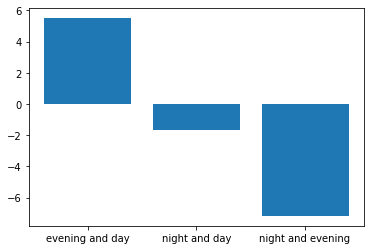

In [288]:
#visualizes the difference
fig, ax = plt.subplots()
plt.bar(x = min_diff_churn["index"], height = min_diff_churn["Difference"])
plt.xticks(ticks=[0,1,2], labels=["evening and day", "night and day", "night and evening"])
plt.show()

People who left, spend less time talking during the day when it more expensive

In [289]:
#lets look at people who did not leave.
avg_min_diff(not_churn, "total day minutes", "total eve minutes", "day time", "evening", "did not churn")
avg_min_diff(not_churn, "total day minutes", "total night minutes", "day time", "night time", "did not churn")
avg_min_diff(not_churn, "total eve minutes", "total night minutes", "evening", "night time", "did not churn")

For customers who did not churn, the average difference in minutes between day time and evening is 23.87 minutes
For customers who did not churn, the average difference in minutes between day time and night time is 24.96 minutes
For customers who did not churn, the average difference in minutes between evening and night time is 1.09 minutes


In [290]:
day_eve_min_diff_not_churn = avg_min_diff2(not_churn, "total day minutes", "total eve minutes")
day_night_min_diff_not_churn = avg_min_diff2(not_churn, "total day minutes", "total night minutes")
eve_night_min_diff_not_churn = avg_min_diff2(not_churn, "total eve minutes", "total night minutes")

In [291]:
min_diff_not_churn = pd.DataFrame([day_eve_min_diff_not_churn, day_night_min_diff_not_churn, eve_night_min_diff_not_churn], 
                              columns = ["Difference"]).reset_index()
min_diff_not_churn

,index,Difference
0,0,23.87
1,1,24.96
2,2,1.09


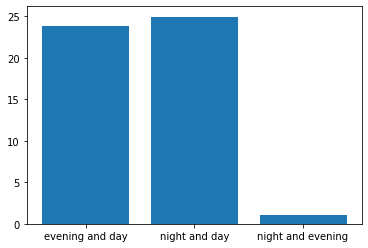

In [292]:
fig, ax = plt.subplots()
plt.bar(x = min_diff_not_churn["index"], height = min_diff_not_churn["Difference"])
plt.xticks(ticks=[0,1,2], labels=["evening and day", "night and day", "night and evening"])
plt.show()

The people that stayed spent even less time talking on the phone when it was more expensive. Could it have been those that left had to be on the phone during the day? <br>
Our model indicated that people left because their bill was too high. Perhaps the people that left were doing business during the day and had to be on the phone. SyriaTel may consider a business package. But more data would be needed to determine that. 

In [293]:
def avg_call_diff(df, col1, col2, period1, period2, churn):
    """This function return the amount of calls made during the time periods"""
    average_difference = round(df[col1].mean() - df[col2].mean(), 2)
    print(f"""For customers who {churn}, the average difference in calls between {period1} and {period2} is {average_difference} calls""")

In [294]:
avg_call_diff(churn, "total day calls", "total eve calls", "day time", "evening", "churned")
avg_call_diff(churn, "total day calls", "total night calls", "day time", "night time", "churned")
avg_call_diff(churn, "total eve calls", "total night calls", "evening", "night time", "churned")

For customers who churned, the average difference in calls between day time and evening is 0.77 calls
For customers who churned, the average difference in calls between day time and night time is 0.94 calls
For customers who churned, the average difference in calls between evening and night time is 0.16 calls


In [295]:
avg_call_diff(not_churn, "total day calls", "total eve calls", "day time", "evening", "did not churn")
avg_call_diff(not_churn, "total day calls", "total night calls", "day time", "night time", "did not churn")
avg_call_diff(not_churn, "total eve calls", "total night calls", "evening", "night time", "did not churn")

For customers who did not churn, the average difference in calls between day time and evening is 0.24 calls
For customers who did not churn, the average difference in calls between day time and night time is 0.22 calls
For customers who did not churn, the average difference in calls between evening and night time is -0.02 calls


The customer who did not leave made fewer calls during the day than during the evening compared to those who left

## Investigate some differences between the customers who leave and stay

In [296]:
#On average the customer bill is :
df["total_charge"].mean()

59.44975397539747

In [297]:
#On average the customer who leaves bill is :
churn["total_charge"].mean()

65.35596273291922

In [298]:
#On average the customer who leaves spends this long talking on the phone during the day:
churn["total day minutes"].mean()

206.91407867494814

In [299]:
#On average the customer who leaves pays this much for talking during the day
churn["total day charge"].mean()

35.17592132505176

In [300]:
#On average the customer who stays bill is :
not_churn["total_charge"].mean()

58.44880701754379

In [301]:
#On average the customer who stays spends this long talking on the phone during the day:
not_churn["total day minutes"].mean()

175.17575438596492

In [302]:
#On average the customer who stays pays this much for talking during the day
not_churn["total day charge"].mean()

29.780421052631663

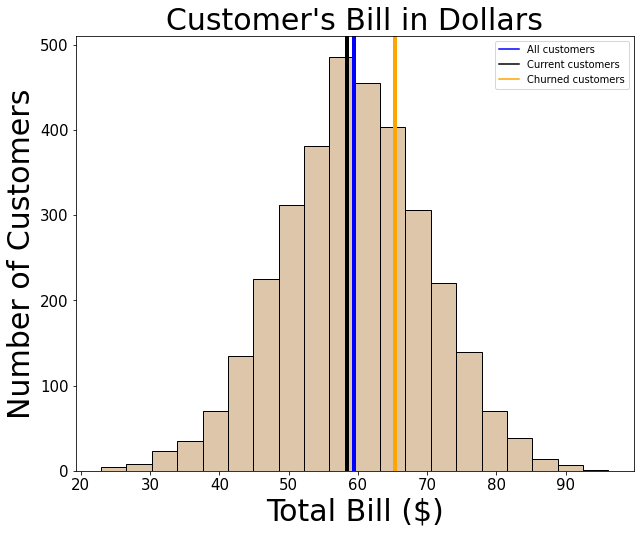

In [303]:
# Visualizing the differences
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df["total_charge"], bins = 20, color= "tan")
# plt.show()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("Total Bill ($)", fontsize = 30)
ax.set_ylabel("Number of Customers", fontsize = 30)
ax.set_title("Customer's Bill in Dollars",fontsize = 30)
plt.axvline(df["total_charge"].mean(), linewidth=4, color='blue')
plt.axvline(churn["total_charge"].mean(), linewidth=4, color='orange')
plt.axvline(not_churn["total_charge"].mean(), linewidth=4, color='black')


lgd = []
lgd.append(plt.axvline(df["total_charge"].mean(), color = 'blue', label = 'All customers'))
lgd.append(plt.axvline(not_churn["total_charge"].mean(), color = 'black', label = 'Current customers'))
lgd.append(plt.axvline(churn["total_charge"].mean(), color = 'orange', label = 'Churned customers'))

plt.legend(handles = lgd)
plt.show()
plt.show()

## International plans

The model indicated having an international plan has weight in determining if a customer were to leave.

In [304]:
# Investingating the features of those with an international plan
intl_plan = df[df["international plan"] == "yes"]
intl_plan

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,501.9,356,49.36,52.09,med-low
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,...,6.3,6,1.70,0,False,647.9,317,65.91,67.61,med-low
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,...,7.1,6,1.92,0,False,471.9,269,44.98,46.90,med-low
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,...,11.2,5,3.02,0,False,807.0,292,77.52,80.54,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,IL,71,yes,no,0,186.1,114,31.64,198.6,140,...,13.8,5,3.73,4,True,591.2,334,57.81,61.54,low
3309,VT,100,yes,no,0,219.4,112,37.30,225.7,102,...,12.0,4,3.24,4,False,700.4,309,67.97,71.21,med-low
3317,SD,163,yes,no,0,197.2,90,33.52,188.5,113,...,7.8,8,2.11,1,False,596.8,297,59.04,61.15,med-low
3320,GA,122,yes,no,0,140.0,101,23.80,196.4,77,...,9.7,4,2.62,4,True,456.5,311,45.89,48.51,med-low


In [305]:
#investigating those with out an international plan
no_intl_plan = df[df["international plan"] == "no"]
no_intl_plan

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,527.2,328,59.00,62.29,high
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,...,7.5,7,2.03,3,False,779.3,314,76.28,78.31,med
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,...,8.7,4,2.35,1,False,751.9,267,70.97,73.32,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,no,no,0,134.7,98,22.90,189.7,68,...,11.8,5,3.19,2,False,545.8,294,48.98,52.17,high
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,661.5,258,63.93,67.74,low


In [306]:
#On average, those with an international plan made 4.61 international calls
intl_plan["total intl calls"].mean()

4.609907120743034

In [307]:
#On average, those without an international plan made 4.47 international calls
no_intl_plan["total intl calls"].mean()

4.465448504983389

In [308]:
#On average, those with an international plan spent 10.63 minutes making international calls
intl_plan["total intl minutes"].mean()

10.628173374613006

In [309]:
#On average, those without an international plan spent 10.2 minutes making international calls
no_intl_plan["total intl minutes"].mean()

10.19534883720929

In [310]:
#On average, those with an international plan spent $2.87 on international calls
intl_plan["total intl charge"].mean()

2.8699071207430373

In [311]:
#On average, those without an international plan spent $2.75 on international calls
no_intl_plan["total intl charge"].mean()

2.7532790697674336

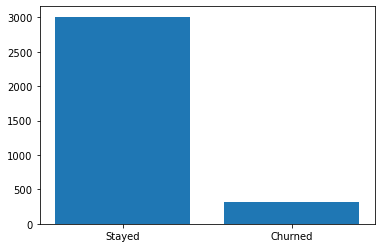

In [312]:
#looks at the distribution of who stayed and who left and if they had an international plan
fig, ax = plt.subplots()
plt.bar(x = df["churn"].unique(), height = df["international plan"].value_counts())
plt.xticks(ticks=[0,1], labels=["Stayed", "Churned"])
plt.show()

In [313]:
#digging deeper, out of those that left, 90% had no international plan.
churn["international plan"].value_counts(normalize=True)

no     0.716356
yes    0.283644
Name: international plan, dtype: float64

In [314]:
#out of those that stayed, 93% had no international plan.
not_churn["international plan"].value_counts(normalize=True)

no     0.934737
yes    0.065263
Name: international plan, dtype: float64

In [315]:
#out of those that left, on average they made 4.1 international calls
churn["total intl calls"].mean()

4.163561076604555

In [316]:
#out of those that stayed, on average they made 4.5 international calls
not_churn["total intl calls"].mean()

4.532982456140351

In [317]:
#out of those that left, on average they spent 10.6 minutes on international call
churn["total intl minutes"].mean()

10.699999999999996

In [318]:
#out of those that stayed, on average they spent 10.1 minutes on international call
not_churn["total intl minutes"].mean()

10.158877192982445

In [319]:
#out of those that left, on average spend $2.89 more on international calls 
churn["total intl charge"].mean()

2.889544513457558

In [320]:
#out of those that left, on average spend $2.74 more on international calls 
not_churn["total intl charge"].mean()

2.7434035087719235

In [321]:
#rate for those with an international plan
intl_plan["total intl charge"].mean() / intl_plan["total intl minutes"].mean()

0.27002825599347513

In [322]:
#rate for those without an international plan
no_intl_plan["total intl charge"].mean() / no_intl_plan["total intl minutes"].mean()

0.27005246350364914

There is no difference between international rates for those who have an international plan and those that do not.
This may be an opportunity to decide if developing an international plan will help retain customers.

## High churn states

In [1]:
#makes a dataframe with high states and their churn percent
high_churn = states_churn_rate.loc[states_churn_rate['percent'] >= .2]
high_churn_states = pd.DataFrame(high_churn[['state', "percent"]])
high_churn_states["percent"] = round(high_churn_states["percent"]*100, 2)
high_churn_states

SyntaxError: invalid syntax (Temp/ipykernel_16556/3028885917.py, line 1)

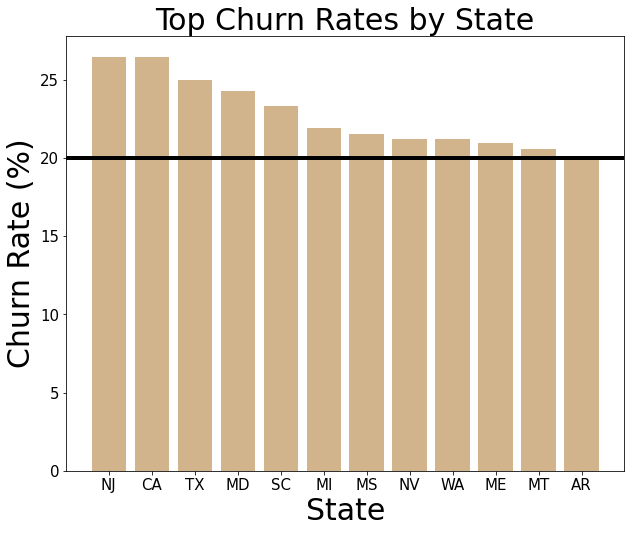

In [324]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x = high_churn_states["state"], height = high_churn_states["percent"], color = "tan")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("State", fontsize = 30)
ax.set_ylabel("Churn Rate (%)", fontsize = 30)
ax.set_title("Top Churn Rates by State",fontsize = 30)
plt.axhline(y=20, linewidth=4, color='black')
plt.show()

SyriaTel loses 1 in 5 customers or more in each of these states. These are prime targets for marketing campaigns to improve customer retention. 

## Customer Service Calls
Our model indicated the number of customer service calls impacted where a customer would remain with the company or not.

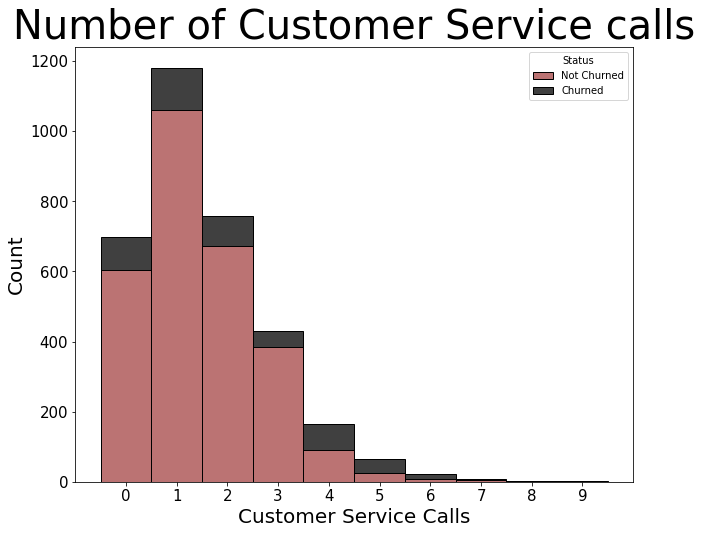

In [325]:
fig,ax = plt.subplots(figsize=(10,8))

bins = np.arange(11) - 0.5

ax = sns.histplot(
    df,
    x='customer service calls',
    hue='churn',
    multiple='stack',
    hue_order=[1,0],
    bins=bins,
    palette=['#0000', '#A44444']

)

ax.set_title('Number of Customer Service calls', fontsize = 40)
ax.set_xlabel("Customer Service Calls", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(range(10), fontsize = 15)
plt.xlim([-1, 10])

ax.legend(title= "Status", labels = ["Not Churned", 'Churned'])

The graph shows a large drop off if customers service calls after 3 calls, but after that the proportion of people who left increased as the number of calls increased. It would be adviasable to offere a discount if someone calls four times to help retain their business without offering to many people would stay otherwise.

In [326]:
#Investigate the dataframe one more time
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,False,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,False,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,False,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,False,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,False,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,False,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,False,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,False,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,False,512.6,326,56.18,57.53,med


In [327]:
df.to_pickle("../../data/model1.pkl")